In [0]:
import os
import requests
import zipfile
import cv2
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy

Using TensorFlow backend.


In [0]:
#hyper params
batch_size = 10

In [0]:
# defineing utility methods
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
# unzipfile
with zipfile.ZipFile("/content/drive/My Drive/tif_extended.zip", 'r') as zip_ref:
    zip_ref.extractall("./trainingSrc")

In [0]:
PATH = "./trainingSrc/tif_extended"
CLASSES = os.listdir(PATH)

In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split = 0.2)
images = image_generator.flow_from_directory(
    PATH, 
    batch_size = 1,
    target_size = (256, 256),
)
sample, label = next(images)
feature_dataframe = []
target_dataframe = []

# for line in images:
#   print(line[1])

len(images[0][0])
images[0][0][0].shape
images[0][1][0]

for i in range(len(images)):
  feature_dataframe.append(images[i][0][0])
  target_dataframe.append(images[i][1][0])

feature_dataframe = numpy.array(feature_dataframe)
target_dataframe = numpy.array(target_dataframe)

Found 1222 images belonging to 7 classes.


In [0]:
# create network
model = keras.Sequential()

# input and first convolution: extract 30 features
model.add(keras.layers.Conv2D(30, 2, activation="relu", input_shape = (256, 256, 3)))
model.add(keras.layers.Conv2D(60, kernel_size=5, strides=(2, 2), activation="relu"))#(60, 5, stri activation="relu"))
# input and second convolution: extract 30 features
model.add(keras.layers.Conv2D(60, 5, activation="relu"))
model.add(keras.layers.Conv2D(30, 3, activation="relu"))
model.add(keras.layers.MaxPooling2D(2))

# input and third convolution: extract 30 features
model.add(keras.layers.Conv2D(60, 5, activation="relu"))
model.add(keras.layers.MaxPooling2D(2))

#flatten
model.add(keras.layers.Flatten())
# three dense layers
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(28, activation="relu"))
model.add(keras.layers.Dense(7, activation="softmax"))

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["acc"]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 255, 255, 30)      390       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 126, 126, 60)      45060     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 122, 122, 60)      90060     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 120, 120, 30)      16230     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 60, 60, 30)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 60)        45060     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 60)       

In [0]:
model.fit(
    x = feature_dataframe,
    y = target_dataframe,
    batch_size = batch_size,
    epochs = 10,
    validation_split = 0.2
)

In [0]:
model.predict(feature_dataframe[50:55])

array([[1.1110809e-19, 3.7093490e-14, 1.8923227e-17, 9.1113508e-33,
        1.0000000e+00, 7.1703033e-15, 2.7414564e-12],
       [6.3703857e-14, 9.9999964e-01, 5.2441029e-15, 9.3788841e-14,
        2.3721440e-11, 3.5920795e-07, 4.4270611e-14],
       [5.1025184e-11, 1.1880393e-11, 7.2476469e-11, 8.7143626e-11,
        2.8891034e-10, 3.2023203e-15, 1.0000000e+00],
       [1.7539916e-29, 2.4765969e-26, 2.1275151e-24, 1.0000000e+00,
        7.4622412e-18, 4.2520960e-35, 4.2850030e-28],
       [6.8009999e-03, 9.9316543e-01, 2.2287594e-07, 8.9838537e-09,
        2.9365947e-05, 2.2730485e-06, 1.6445435e-06]], dtype=float32)

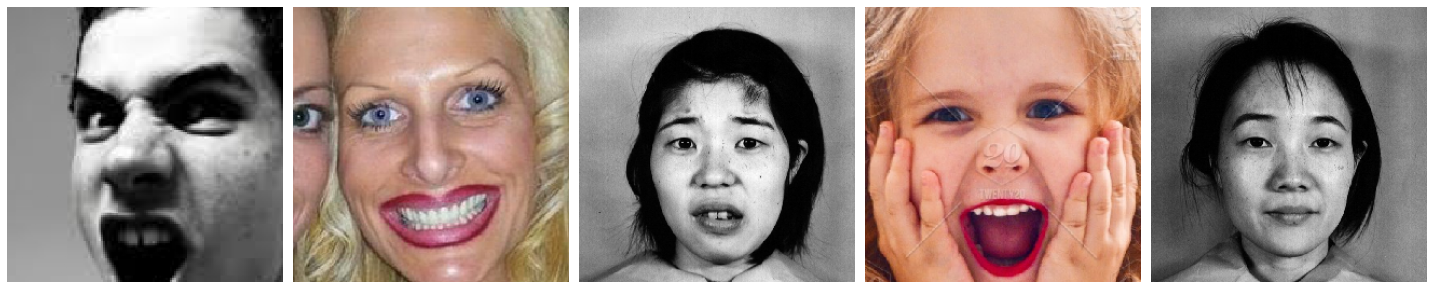

In [0]:
plotImages(feature_dataframe[50:55])


In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
